In [1]:
import ibm_db

In [2]:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "qqm47080"      # e.g. "abc12345"
dsn_pwd =  "p9sgk4517fgbr+k1"     # e.g. "7dBZ3wWt9XN6$o0J"
dsn_driver = "DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=qqm47080;PWD=p9sgk4517fgbr+k1;"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [3]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
    
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  qqm47080 on host:  dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net


In [4]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [6]:
Dropquery = ibm_db.exec_immediate(conn,"DROP TABLE Instructor")

In [7]:
Createquery = "CREATE TABLE Instructor(ID INTEGER PRIMARY KEY NOT NULL,Fname VARCHAR(20),Lname VARCHAR(20),City VARCHAR(20),Ccode char(3))"
Createstate = ibm_db.exec_immediate(conn,Createquery)

In [7]:
Createvalues="INSERT INTO INSTRUCTOR VALUES(1,'raul','Gibson','Troy','ALB')"
Insertstate=ibm_db.exec_immediate(conn,Createvalues)

In [8]:
Createvalues1="INSERT INTO INSTRUCTOR VALUES(2,'Gabe','Cariolla','Cliftonpark','SS')"
Insertstate1=ibm_db.exec_immediate(conn,Createvalues1)

In [9]:
Createvalues2="INSERT INTO INSTRUCTOR VALUES(3,'Kyle','Denis','Rensellear','NY')"
Insertstate2=ibm_db.exec_immediate(conn,Createvalues2)

In [18]:
selectquery="SELECT * FROM INSTRUCTOR"
selectstate=ibm_db.exec_immediate(conn,selectquery)
ibm_db.fetch_both(selectstate)

{'ID': 1,
 0: 1,
 'FNAME': 'raul',
 1: 'raul',
 'LNAME': 'Gibson',
 2: 'Gibson',
 'CITY': 'Troy',
 3: 'Troy',
 'CCODE': 'ALB',
 4: 'ALB'}

In [19]:
while ibm_db.fetch_row(selectstate) != False:
   print (" ID:",  ibm_db.result(selectstate, 0), " Fname:",  ibm_db.result(selectstate, "FNAME"))

 ID: 2  Fname: Gabe
 ID: 3  Fname: Kyle


In [13]:
updatequery="UPDATE Instructor SET City='Moosetown' WHERE Fname='Raul' "
updatestate=ibm_db.exec_immediate(conn,updatequery)

In [8]:
import ibm_db_dbi
import pandas

In [9]:
pconn=ibm_db_dbi.Connection(conn)

In [23]:
df=pandas.read_sql('SELECT * FROM Instructor',pconn)
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,raul,Gibson,Troy,ALB
1,2,Gabe,Cariolla,Cliftonpark,SS
2,3,Kyle,Denis,Rensellear,NY


In [24]:
df.CITY[1]

'Cliftonpark'

In [26]:
df.iloc[0:2,0:4]

,ID,FNAME,LNAME,CITY
0,1,raul,Gibson,Troy
1,2,Gabe,Cariolla,Cliftonpark


In [29]:
df.shape

(3, 5)

In [30]:
ibm_db.close(conn)

True

In [12]:
selectquery="SELECT * FROM EMPLOYEES"
selectst=ibm_db.exec_immediate(conn,selectquery)
ibm_db.fetch_both(selectst)

{'EMP_ID': 'E1001    ',
 0: 'E1001    ',
 'F_NAME': 'John',
 1: 'John',
 'L_NAME': 'Thomas',
 2: 'Thomas',
 'SSN': '123456   ',
 3: '123456   ',
 'B_DATE': datetime.date(1976, 1, 9),
 4: datetime.date(1976, 1, 9),
 'SEX': 'M',
 5: 'M',
 'ADDRESS': '5631 Rice, OakPark,IL',
 6: '5631 Rice, OakPark,IL',
 'JOB_ID': '100      ',
 7: '100      ',
 'SALARY': '100000.00',
 8: '100000.00',
 'MANAGER_ID': '30001    ',
 9: '30001    ',
 'DEP_ID': '2        ',
 10: '2        '}

In [15]:
import pandas
import ibm_db_dbi
checkconn=ibm_db_dbi.Connection(conn)
df=pandas.read_sql('SELECT * FROM EMPLOYEES',checkconn)
df

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
0,E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.0,30001,2
1,E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.0,30002,5
2,E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000.0,30002,5
3,E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000.0,30004,5
4,E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000.0,30001,2
5,E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000.0,30001,2
6,E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000.0,30003,7
7,E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000.0,30003,7
8,E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000.0,30003,7
9,E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000.0,30004,5


In [16]:
df.describe(include='all')

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
count,10,10,10,10,10,10,10,10,10.000000,10,10
unique,10,10,9,10,10,2,10,10,NaN,4,3
top,E1002,Ahmed,Thomas,123411,1981-01-04,M,"5631 Rice, OakPark,IL",400,NaN,30001,5
freq,1,1,2,1,1,5,1,1,NaN,3,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72000.000000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14567.848922,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77500.000000,NaN,NaN


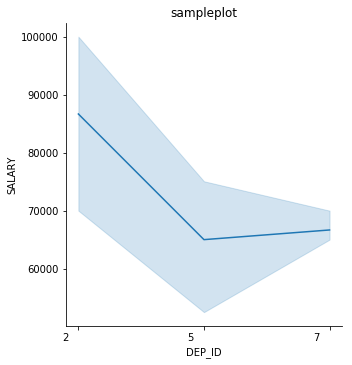

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plot=sns.relplot(x='DEP_ID',y='SALARY',kind='line', data=df)
#plt.setp(plot.get_xticklabels(),rotation=90)
plt.title("sampleplot")
plt.show()

In [29]:
df['SALARY'].describe()

count        10.000000
mean      72000.000000
std       14567.848922
min       50000.000000
25%       65000.000000
50%       70000.000000
75%       77500.000000
max      100000.000000
Name: SALARY, dtype: float64

In [35]:
df['SALARY'].idxmax()

0

In [33]:
df.at[7,'EMP_ID']

'E1008    '